In [1]:
#conda install -c anaconda graphviz

In [2]:
#conda update -n base -c conda-forge conda

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

In [50]:
df1 = pd.read_csv('yrs_lost_econ_data_viz.csv')
df1.head(10)

,year,state,avg_yrs_life_lost,total_yrs_life_lost,num_victims_killed,region,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita
0,2006,AZ,53.21,478.9,9,Southwest,30543.0,16.99,4.3,32227.81
1,2006,CA,48.31,966.2,20,West,32680.0,15.61,4.9,39744.53
2,2006,CT,57.34,286.7,5,Northeast,38604.0,11.89,4.4,49358.64
3,2006,FL,61.08,244.3,4,South,33104.0,13.03,2.5,32636.88
4,2006,GA,50.11,400.9,8,South,28633.0,16.23,5.1,35032.64
5,2006,IA,49.86,249.3,5,Midwest,27974.0,13.61,3.7,33875.34
6,2006,IN,49.13,736.9,15,Midwest,27862.0,14.00,5.0,32385.43
7,2006,KS,50.04,500.4,10,Midwest,29515.0,14.83,4.4,32622.10
8,2006,KY,69.78,279.1,4,South,26454.0,13.81,5.7,28723.81
9,2006,LA,36.65,806.3,22,South,27330.0,14.73,4.1,38148.75


In [61]:
formula1 = 'total_yrs_life_lost ~   gdp_per_capita + num_victims_killed ' # pce_per_capita + + unemp_rate + + pce_per_capita

model1 = sm.ols(formula = formula1, data = df1).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     total_yrs_life_lost   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.873
Method:                  Least Squares   F-statistic:                     1014.
Date:                 Sun, 05 Feb 2023   Prob (F-statistic):          3.65e-132
Time:                         01:16:52   Log-Likelihood:                -1824.0
No. Observations:                  295   AIC:                             3654.
Df Residuals:                      292   BIC:                             3665.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.0

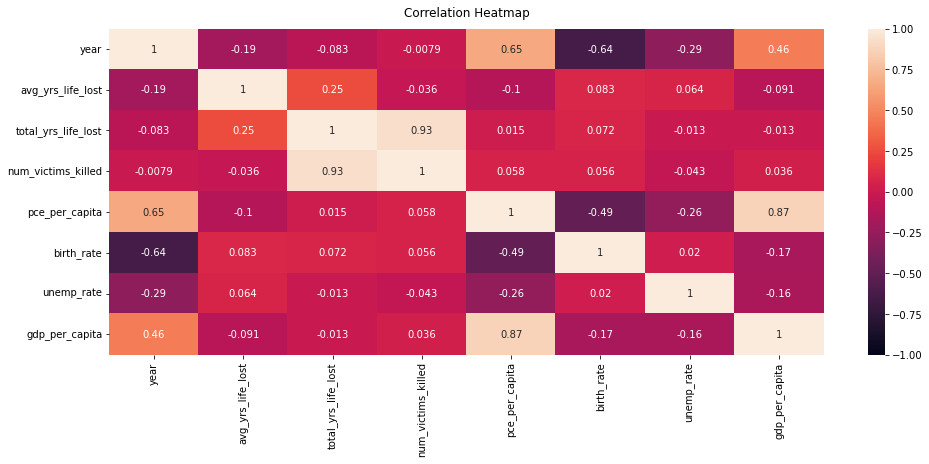

In [5]:
corr = df1.corr(method='pearson')
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Decision Trees

In [6]:
df1.describe()

,year,avg_yrs_life_lost,total_yrs_life_lost,num_victims_killed,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2013.698305,45.171661,384.348814,8.623729,37005.023729,12.516441,6.104407,49654.963492
std,4.694819,14.119046,331.016331,7.293934,6528.538053,1.529721,2.211045,17500.288642
min,2006.000000,-2.100000,-8.400000,4.000000,25824.000000,9.430000,2.100000,27853.590000
25%,2010.000000,36.700000,181.900000,4.000000,32112.000000,11.430000,4.450000,38503.240000
50%,2014.000000,46.670000,261.800000,5.000000,35984.000000,12.360000,5.600000,45927.200000
75%,2018.000000,55.240000,473.950000,10.000000,40262.000000,13.245000,7.600000,56457.610000
max,2021.000000,79.400000,2296.600000,60.000000,62416.000000,21.220000,13.300000,172221.520000


In [7]:
df1 = pd.get_dummies(df1)
# Display the first 5 rows of the last 12 columns
df1.head(5)

,year,avg_yrs_life_lost,total_yrs_life_lost,num_victims_killed,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita,state_AK,state_AL,...,state_VT,state_WA,state_WI,state_WV,state_WY,region_Midwest,region_Northeast,region_South,region_Southwest,region_West
0,2006,53.21,478.9,9,30543.0,16.99,4.3,32227.81,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,48.31,966.2,20,32680.0,15.61,4.9,39744.53,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2006,57.34,286.7,5,38604.0,11.89,4.4,49358.64,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,61.08,244.3,4,33104.0,13.03,2.5,32636.88,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,50.11,400.9,8,28633.0,16.23,5.1,35032.64,0,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='pce_per_capita', ylabel='total_yrs_life_lost'>

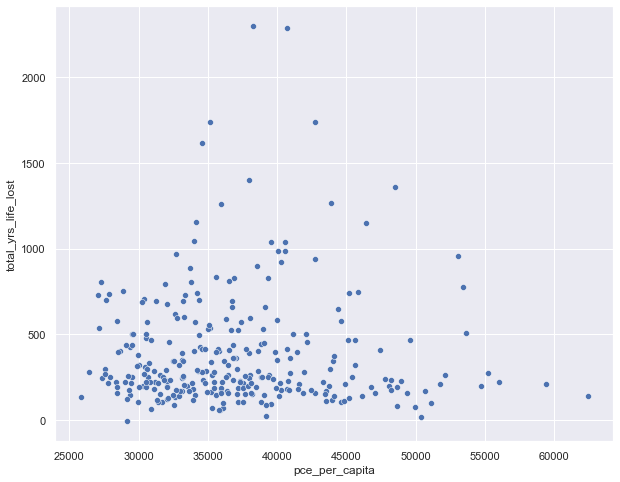

In [28]:
sns.scatterplot(data=df1,  x= 'pce_per_capita', y = 'total_yrs_life_lost' )

In [9]:
X = df1.drop(columns=['total_yrs_life_lost']) #'avg_yrs_life_lost',
y = df1.total_yrs_life_lost 

In [10]:
X

,year,avg_yrs_life_lost,num_victims_killed,pce_per_capita,birth_rate,unemp_rate,gdp_per_capita,state_AK,state_AL,state_AR,...,state_VT,state_WA,state_WI,state_WV,state_WY,region_Midwest,region_Northeast,region_South,region_Southwest,region_West
0,2006,53.21,9,30543.0,16.99,4.3,32227.81,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,48.31,20,32680.0,15.61,4.9,39744.53,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2006,57.34,5,38604.0,11.89,4.4,49358.64,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,61.08,4,33104.0,13.03,2.5,32636.88,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,50.11,8,28633.0,16.23,5.1,35032.64,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2021,36.63,6,43305.0,11.02,4.0,52031.28,0,0,0,...,0,0,0,0,0,0,0,1,0,0
291,2021,43.18,4,42469.0,11.72,4.3,59968.62,0,0,0,...,0,0,0,0,0,0,0,1,0,0
292,2021,39.05,12,45114.0,12.65,5.7,67235.25,0,0,0,...,0,0,0,0,0,0,0,0,1,0
293,2021,53.00,4,51751.0,10.84,5.2,86264.81,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((236, 60), (59, 60), (236,), (59,))

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestRegressor(n_estimators= 30, random_state= 30, max_depth= 3)

In [16]:
rf = model.fit(X_train, y_train)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score, r2_score

In [18]:
y_train_pred = rf.predict(X_train)

In [19]:
print("The train MAE is %.2f"% mean_absolute_error(y_train,y_train_pred))
print("The train RMSE is %.2f"% mean_squared_error(y_train,y_train_pred)**0.5)
print("The EVS is %.2f"% explained_variance_score(y_train,y_train_pred))


The train MAE is 50.56
The train RMSE is 76.24
The EVS is 0.94


### Using test data to check for overfitting

In [20]:
y_test_pred = rf.predict(X_test)

In [21]:
## Test Mean Absolute Error, Root mean Square Error, Explained Variance Score (Rsquare)
print("The test MAE is %.2f"% mean_absolute_error(y_test,y_test_pred))
print("The test RMSE is %.2f"% mean_squared_error(y_test,y_test_pred)**0.5)
print("The test EVS is %.2f"% explained_variance_score(y_test,y_test_pred))


The test MAE is 64.89
The test RMSE is 108.98
The test EVS is 0.91


### Visulizing the tree 

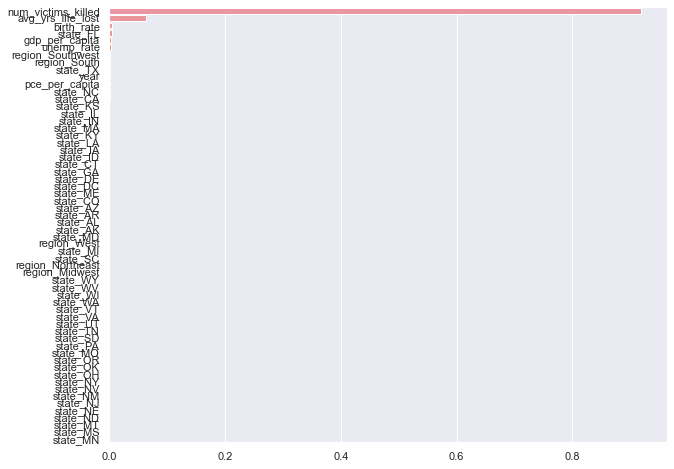

In [22]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns[indices]

sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=importance[indices], y=feature_names) 

plt.show()

In [23]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from subprocess import call
#from graphviz import Source